In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 🔹 Point this to your dataset root
data_dir = Path("../data/FireRisk")



Contents of ../data/FireRisk/train:
  Class Water → 1729 files
  Class Moderate → 8617 files
  Class High → 6296 files
  Class Very_Low → 21757 files
  Class Very_High → 3268 files
  Class Low → 10705 files
  Class Non-burnable → 17959 files

Sample image path: ../data/FireRisk/train/Water/27969591_7_-83.5019017518993_43.7521064929443.png
Image size (W,H): (320, 320)
Image mode (PIL): RGB
Array shape (H,W,C): (320, 320, 3)
Array dtype: uint8


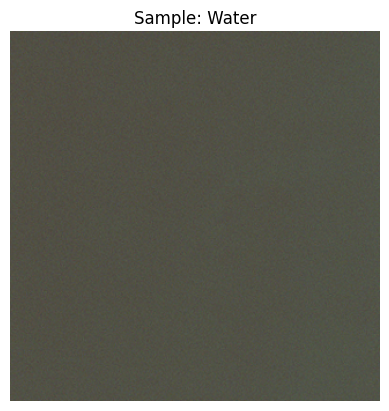


Inspecting first 5 images in train set:
[0] 27969591_7_-83.5019017518993_43.7521064929443.png: shape=(320, 320, 3), mode=RGB
[1] 34774191_7_-84.4010308949594_42.7600567803382.png: shape=(320, 320, 3), mode=RGB
[2] 27551921_7_-75.6740908687964_42.8304201361688.png: shape=(320, 320, 3), mode=RGB
[3] 29981491_7_-87.6964068434762_43.7668937631265.png: shape=(320, 320, 3), mode=RGB
[4] 31437671_7_-95.5115461891431_43.7990797571121.png: shape=(320, 320, 3), mode=RGB


In [ ]:

# Peek into the structure
for split in ["train", "test"]:
    split_dir = data_dir / split
    if split_dir.exists():
        print(f"\nContents of {split_dir}:")
        for cls in os.listdir(split_dir):
            cls_path = split_dir / cls
            if cls_path.is_dir():
                print(f"  Class {cls} → {len(list(cls_path.glob('*')))} files")

# 🔹 Load one sample image to inspect channels, size, dtype
sample_path = next((data_dir / "train").rglob("*.*"))  # first file it finds
print("\nSample image path:", sample_path)

img = Image.open(sample_path)
arr = np.array(img)

print("Image size (W,H):", img.size)
print("Image mode (PIL):", img.mode)  # "RGB", "L" (grayscale), etc.
print("Array shape (H,W,C):", arr.shape)
print("Array dtype:", arr.dtype)

# 🔹 Visualize the sample
plt.imshow(img)
plt.title(f"Sample: {sample_path.parent.name}")
plt.axis("off")
plt.show()

# 🔹 Check multiple samples quickly
print("\nInspecting first 5 images in train set:")
for i, f in enumerate((data_dir / "train").rglob("*.*")):
    img = Image.open(f)
    arr = np.array(img)
    print(f"[{i}] {f.name}: shape={arr.shape}, mode={img.mode}")
    if i >= 4:
        break


In [8]:
import os
from pathlib import Path

# 🔹 Dataset root
data_dir = Path("../data/FireRisk")

# 🔹 Count images per class
for split in ["train", "test"]:
    split_dir = data_dir / split
    if split_dir.exists():
        print(f"\n=== {split.upper()} SET ===")
        total_images = 0
        for cls in sorted(os.listdir(split_dir)):
            cls_path = split_dir / cls
            if cls_path.is_dir():
                count = len(list(cls_path.glob("*.*")))
                total_images += count
                print(f"  Class {cls:<15} → {count} images")
        print(f"  >> Total images in {split}: {total_images}")



=== TRAIN SET ===
  Class High            → 6296 images
  Class Low             → 10705 images
  Class Moderate        → 8617 images
  Class Non-burnable    → 17959 images
  Class Very_High       → 3268 images
  Class Very_Low        → 21757 images
  Class Water           → 1729 images
  >> Total images in train: 70331



=== TRAIN SET ===  
  Class High            → 6296 images  
  Class Low             → 10705 images  
  Class Moderate        → 8617 images  
  Class Non-burnable    → 17959 images  
  Class Very_High       → 3268 images  
  Class Very_Low        → 21757 images  
  Class Water           → 1729 images  
  >> Total images in train: 70331  



  Head class - [Very_Low, Non-burnable, ]   
  Medium class - [Low, Moderate]   
  Tail class - [High, Very_High, Water]   

In [4]:
from PIL import Image
import numpy as np
im = Image.open("../bad_img_0.png")
im_arr = np.array(im)
print("bad_image_0.png shape, dtype, min, max:", im_arr.shape, im_arr.dtype, im_arr.min(), im_arr.max())
im.show()   # opens a viewer from Python (may block)


bad_image_0.png shape, dtype, min, max: (224, 224, 3) uint8 37 188


In [6]:
# data folder check 


# run from project root
import os, pprint

train_root = "../data/FireRisk/train"
val_root   = "../data/FireRisk/val"

def folder_counts(root):
    d = {}
    if not os.path.isdir(root):
        print(root, "does not exist")
        return d
    for cls in sorted(os.listdir(root)):
        p = os.path.join(root, cls)
        if os.path.isdir(p):
            files = [f for f in os.listdir(p) if os.path.isfile(os.path.join(p,f))]
            d[cls] = len(files)
    return d

print("TRAIN folder counts:")
pprint.pprint(folder_counts(train_root))
print("\nVAL folder counts:")
pprint.pprint(folder_counts(val_root))


TRAIN folder counts:
{'High': 6296,
 'Low': 10705,
 'Moderate': 8617,
 'Non-burnable': 17959,
 'Very_High': 3268,
 'Very_Low': 21757,
 'Water': 1729}

VAL folder counts:
{'High': 1609,
 'Low': 2599,
 'Moderate': 1772,
 'Non-burnable': 5091,
 'Very_High': 1438,
 'Very_Low': 8448,
 'Water': 584}
